In [2]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
from IPython.display import display

C:\Users\natha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\natha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [6]:
subway = pd.read_csv('subway_test.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
subway.head()

,datetime,taxi_zone,year_month,day,week,hour,passenger_count,company
0,2022-02-01 00:00:00,24,2022-02,1,Tuesday,0,25.0,Subway
1,2022-02-01 01:00:00,24,2022-02,1,Tuesday,1,11.0,Subway
2,2022-02-01 02:00:00,24,2022-02,1,Tuesday,2,6.0,Subway
3,2022-02-01 03:00:00,24,2022-02,1,Tuesday,3,6.0,Subway
4,2022-02-01 04:00:00,24,2022-02,1,Tuesday,4,8.0,Subway


In [7]:
taxi = pd.read_parquet("basic_taxi_df_cleaned_100624.parquet")
taxi.head()

,taxi_zone,datetime,passenger_count,year_month,day,week,hour,company
0,4,2023-06-01 00:00:00,31.0,2023-06,1,Thursday,0,Yellow/Green Taxi
1,4,2023-06-01 01:00:00,12.0,2023-06,1,Thursday,1,Yellow/Green Taxi
2,4,2023-06-01 02:00:00,9.0,2023-06,1,Thursday,2,Yellow/Green Taxi
3,4,2023-06-01 03:00:00,2.0,2023-06,1,Thursday,3,Yellow/Green Taxi
4,4,2023-06-01 04:00:00,1.0,2023-06,1,Thursday,4,Yellow/Green Taxi


In [8]:
uber = pd.read_parquet("basic_uber_df_cleaned_100624.parquet")
uber.head()

,taxi_zone,datetime,passenger_count,year_month,day,week,hour,company
0,4,2022-01-01 00:00:00,178.0,2022-01,1,Saturday,0,Uber
1,4,2022-01-01 00:00:00,89.0,2022-01,1,Saturday,0,Lyft
2,4,2022-01-01 01:00:00,294.0,2022-01,1,Saturday,1,Uber
3,4,2022-01-01 01:00:00,80.0,2022-01,1,Saturday,1,Lyft
4,4,2022-01-01 02:00:00,292.0,2022-01,1,Saturday,2,Uber


In [9]:
# Concatenate the DataFrames vertically along the rows
df = pd.concat([subway, taxi, uber], axis=0, ignore_index=True)

In [10]:
df.dtypes

datetime            object
taxi_zone            int64
year_month          object
day                  int64
week                object
hour                 int64
passenger_count    float64
company             object
dtype: object

In [11]:
object_columns = df.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')   


df["day"] = df["day"].astype('category') 
df["hour"] = df["hour"].astype('int64')
df["taxi_zone"] = df["taxi_zone"].astype('category') 


df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)

print(df.dtypes)
df

datetime           datetime64[ns]
taxi_zone                category
year_month               category
day                      category
week                     category
hour                        int64
passenger_count           float64
company                  category
dtype: object


,datetime,taxi_zone,year_month,day,week,hour,passenger_count,company
0,2022-02-01 00:00:00,24,2022-02,1,Tuesday,0,25.0,Subway
1,2022-02-01 01:00:00,24,2022-02,1,Tuesday,1,11.0,Subway
2,2022-02-01 02:00:00,24,2022-02,1,Tuesday,2,6.0,Subway
3,2022-02-01 03:00:00,24,2022-02,1,Tuesday,3,6.0,Subway
4,2022-02-01 04:00:00,24,2022-02,1,Tuesday,4,8.0,Subway
...,...,...,...,...,...,...,...,...
4520937,2023-12-31 21:00:00,263,2023-12,31,Sunday,21,218.0,Lyft
4520938,2023-12-31 22:00:00,263,2023-12,31,Sunday,22,387.0,Uber
4520939,2023-12-31 22:00:00,263,2023-12,31,Sunday,22,178.0,Lyft
4520940,2023-12-31 23:00:00,263,2023-12,31,Sunday,23,265.0,Uber


In [12]:
df.to_csv("basic_combined_company_df.csv", index=False)

In [13]:
df = pd.read_csv('basic_combined_company_df.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df.head()

,datetime,taxi_zone,year_month,day,week,hour,passenger_count,company
0,2022-02-01 00:00:00,24,2022-02,1,Tuesday,0,25.0,Subway
1,2022-02-01 01:00:00,24,2022-02,1,Tuesday,1,11.0,Subway
2,2022-02-01 02:00:00,24,2022-02,1,Tuesday,2,6.0,Subway
3,2022-02-01 03:00:00,24,2022-02,1,Tuesday,3,6.0,Subway
4,2022-02-01 04:00:00,24,2022-02,1,Tuesday,4,8.0,Subway


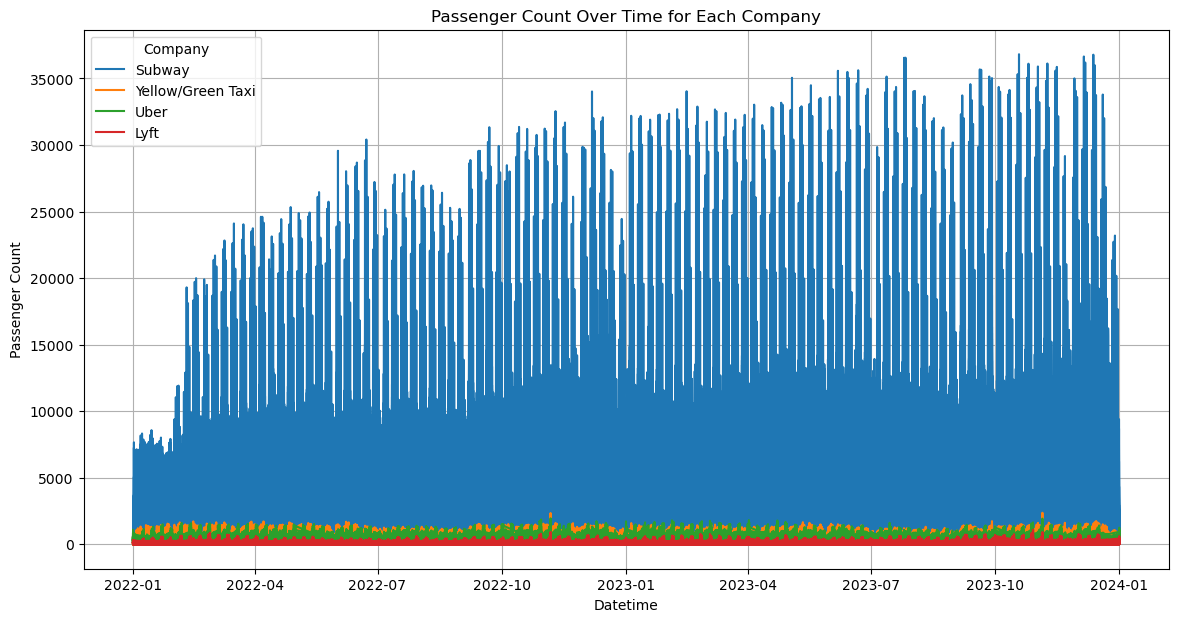

In [19]:
# 1. Passenger count over time for each company
plt.figure(figsize=(14, 7))
for company in df['company'].unique():
    company_data = df[df['company'] == company]
    plt.plot(company_data['datetime'], company_data['passenger_count'], label=company)
plt.title('Passenger Count Over Time for Each Company')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(title='Company')
plt.grid(True)
plt.show()

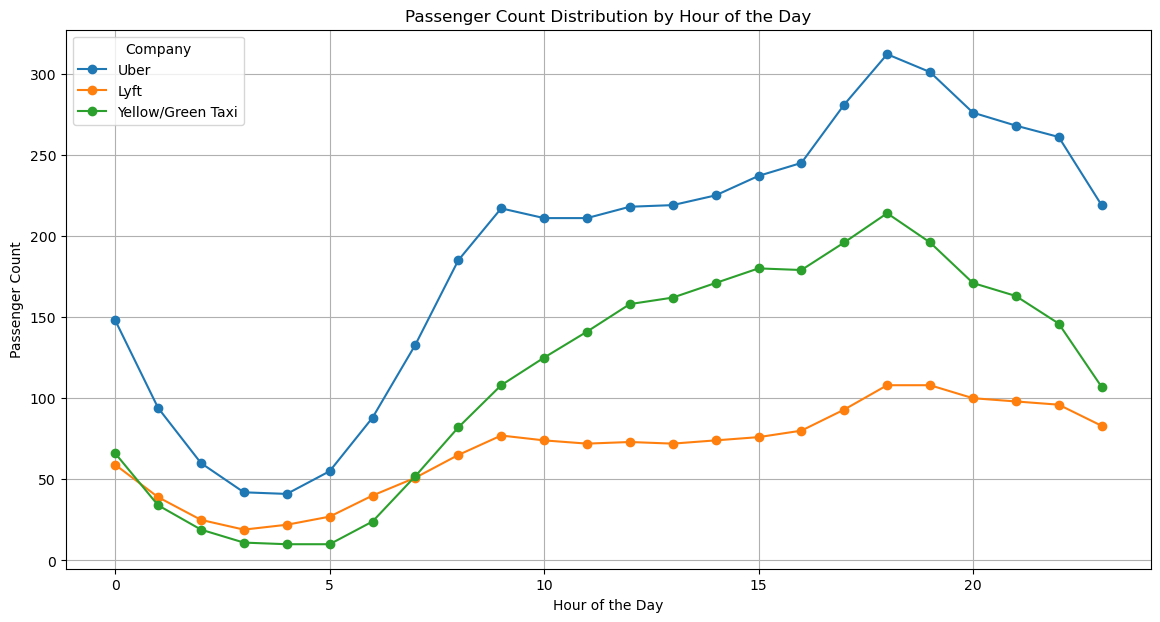

In [15]:
#1.1 Passenger count over time for each company
plt.figure(figsize=(14, 7))
c_list = ['Uber','Lyft','Yellow/Green Taxi']
hours = df['hour'].unique()
hours.sort()
for company in c_list:
    company_data = df[df['company'] == company]
    counts_by_hour = company_data.groupby('hour')['passenger_count'].median().reindex(hours)
    plt.plot(hours, counts_by_hour, marker='o', label=company)
plt.title('Passenger Count Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.legend(title='Company')
plt.grid(True)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_16280\2059462712.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxi_zone_counts = df.groupby('taxi_zone')['passenger_count'].sum().reset_index()


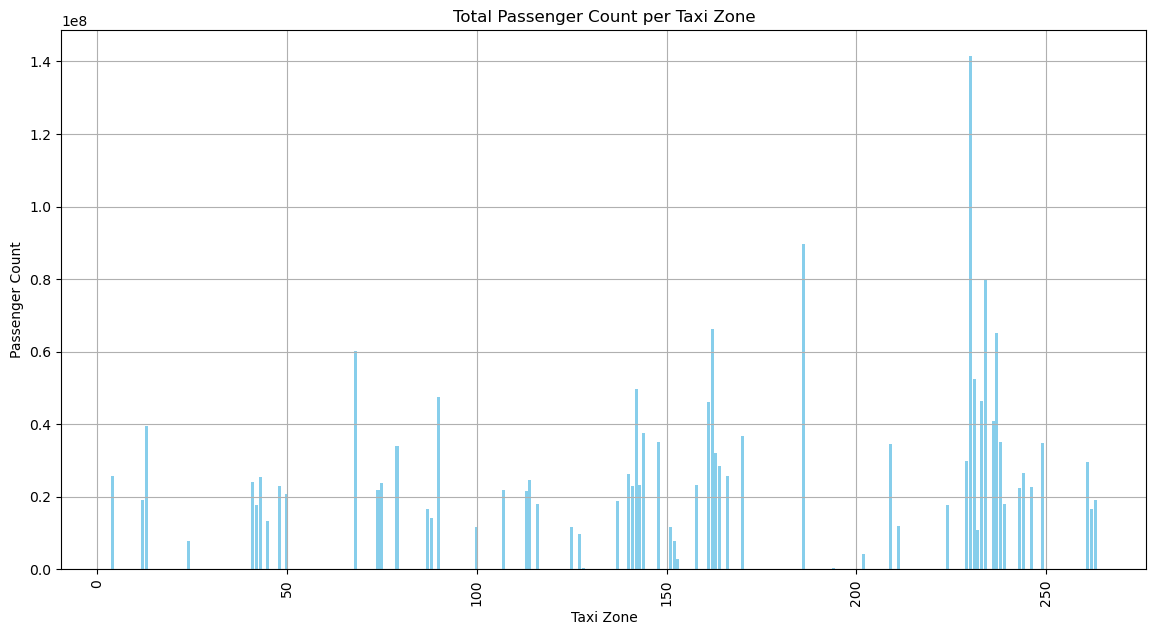

In [16]:
# 2. Total passenger count per taxi zone
plt.figure(figsize=(14, 7))
taxi_zone_counts = df.groupby('taxi_zone')['passenger_count'].sum().reset_index()
plt.bar(taxi_zone_counts['taxi_zone'], taxi_zone_counts['passenger_count'], color='skyblue')
plt.title('Total Passenger Count per Taxi Zone')
plt.xlabel('Taxi Zone')
plt.ylabel('Passenger Count')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

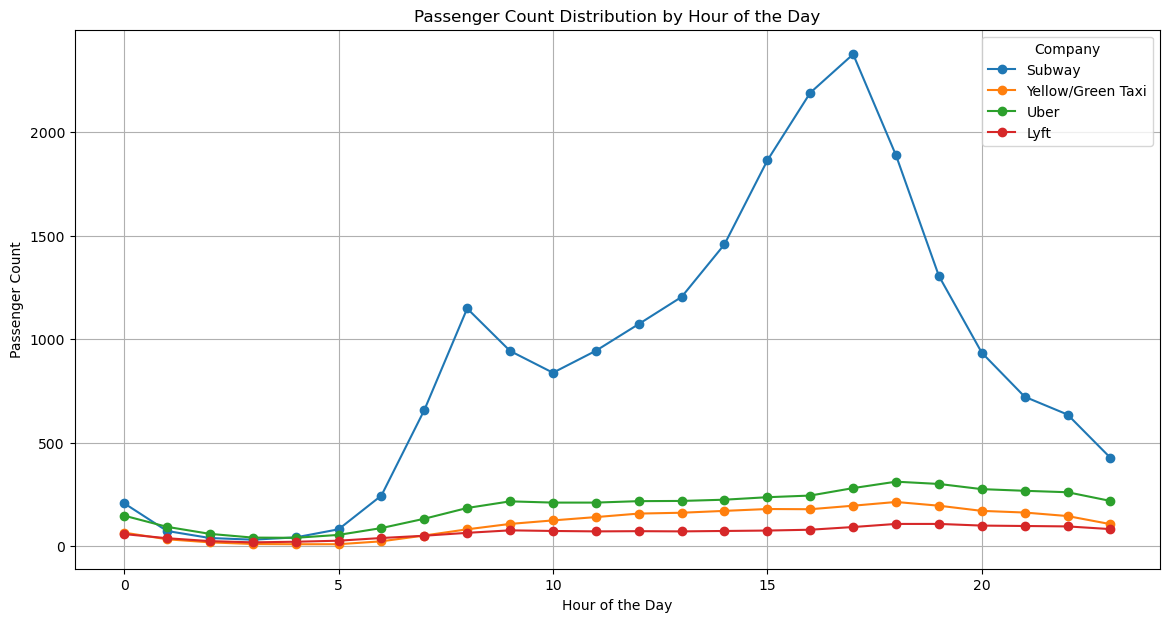

In [33]:
# 3. Passenger count distribution by hour of the day
plt.figure(figsize=(14, 7))
for company in df['company'].unique():
    company_data = df[df['company'] == company]
    counts_by_hour = company_data.groupby('hour')['passenger_count'].median().reindex(hours)
    plt.plot(hours, counts_by_hour, marker='o', label=company)
plt.title('Passenger Count Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Passenger Count')
plt.legend(title='Company')
plt.grid(True)
plt.show()

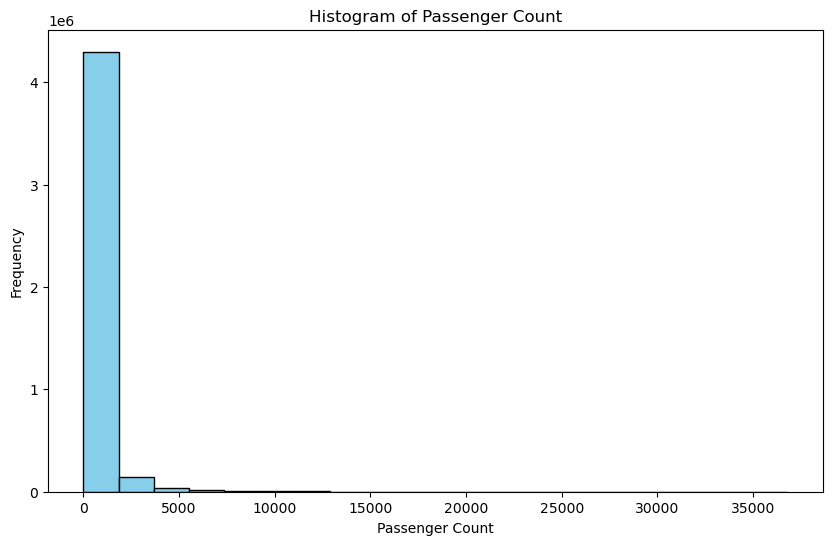

In [23]:
# 4. Histogram of Passenger Count
plt.figure(figsize=(10, 6))
plt.hist(df['passenger_count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_2932\3218149658.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bar = df.groupby(['taxi_zone', 'company'])['passenger_count'].sum().unstack()


<Figure size 1400x700 with 0 Axes>

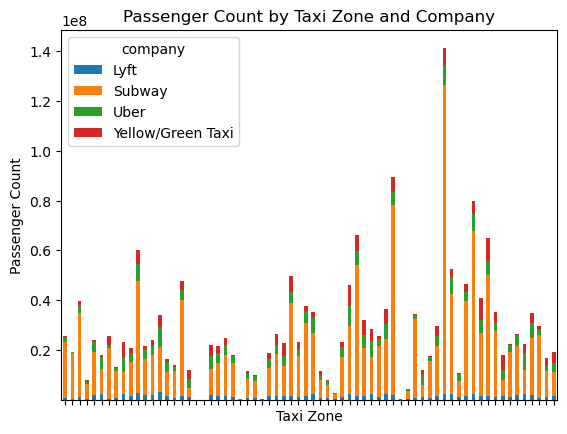

In [16]:
# Group by taxi zone and company and sum the passenger counts
df_bar = df.groupby(['taxi_zone', 'company'])['passenger_count'].sum().unstack()
plt.figure(figsize=(14, 7))


df_bar.plot(kind='bar', stacked=True)

plt.title('Passenger Count by Taxi Zone and Company')
plt.xlabel('Taxi Zone')
plt.ylabel('Passenger Count')

plt.xticks(visible=False)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_2932\4259856752.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='hour', columns='week', values='passenger_count', aggfunc='sum')


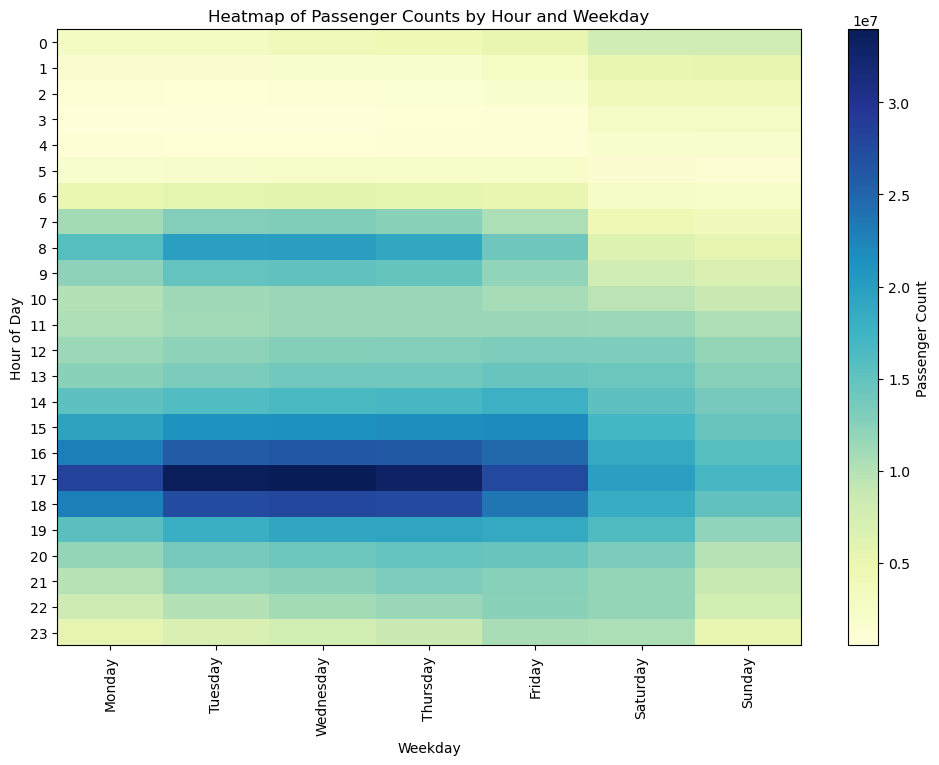

In [17]:
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['week'] = pd.Categorical(df['week'], categories=week_order, ordered=True)

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='hour', columns='week', values='passenger_count', aggfunc='sum')
plt.figure(figsize=(12, 8))

plt.imshow(heatmap_data, aspect='auto', cmap='YlGnBu', interpolation='nearest')
plt.colorbar(label='Passenger Count')
plt.title('Heatmap of Passenger Counts by Hour and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour of Day')

#Set the x and y ticks
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)


plt.show()

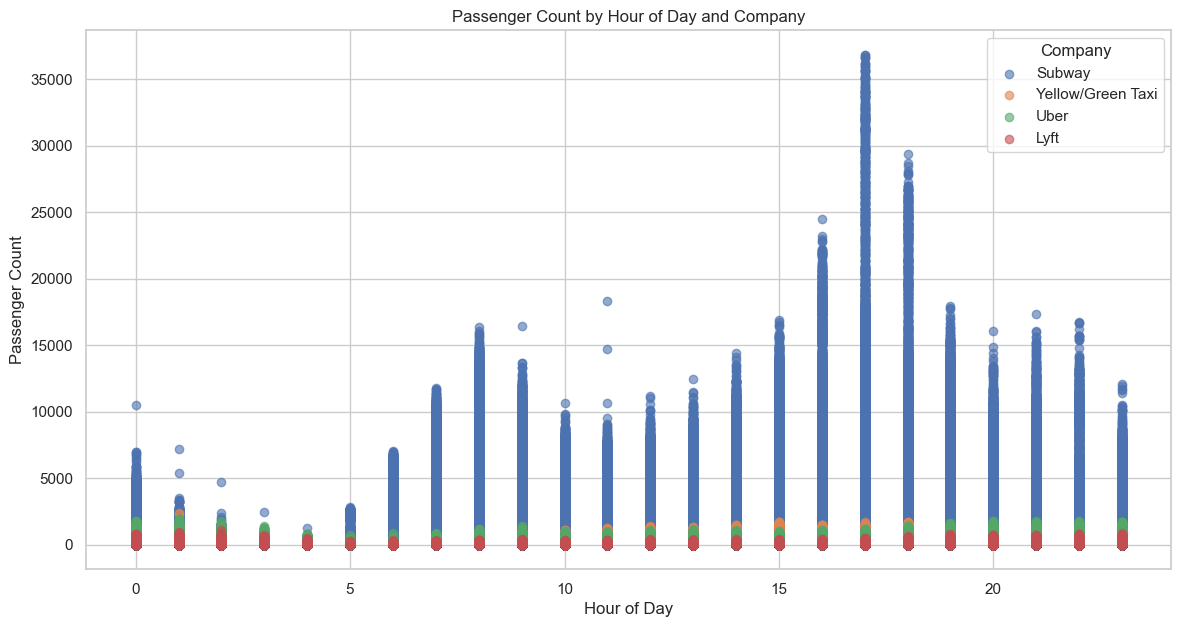

In [34]:
plt.figure(figsize=(14, 7))

for company in df['company'].unique():
    company_data = df[df['company'] == company]
    plt.scatter(company_data['hour'], company_data['passenger_count'], label=company, alpha=0.6)


plt.title('Passenger Count by Hour of Day and Company')
plt.xlabel('Hour of Day')
plt.ylabel('Passenger Count')


plt.legend(title='Company')


plt.show()

In [29]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Group by taxi_zone and datetime and sum passenger_count
df_grouped = df.groupby(['taxi_zone', 'datetime']).agg({'passenger_count': 'sum'}).reset_index()

df_grouped.head()

,taxi_zone,datetime,passenger_count
0,4,2022-01-01 00:00:00,890.500000
1,4,2022-01-01 01:00:00,793.239130
2,4,2022-01-01 02:00:00,686.500000
3,4,2022-01-01 03:00:00,523.891304
4,4,2022-01-01 04:00:00,351.956522


In [33]:
df = df_grouped
# Extract year and month
df['year_month'] = df['datetime'].dt.to_period('M')

# Extract day of week (Monday=0, Sunday=6)
df['day'] = df['datetime'].dt.day

# Extract day of week (Monday=0, Sunday=6)
df['week'] = df['datetime'].dt.dayofweek

# Extract hour of the day
df['hour'] = df['datetime'].dt.hour

days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['week'] = df['week'].apply(lambda x: days[x]) 

In [34]:
df = df.to_csv("basic_combined_df.csv", index=False)

In [95]:
df = pd.read_csv('basic_combined_df.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df.head()

,taxi_zone,datetime,passenger_count,year_month,day,week,hour
0,4,2022-01-01 00:00:00,890.500000,2022-01,1,Saturday,0
1,4,2022-01-01 01:00:00,793.239130,2022-01,1,Saturday,1
2,4,2022-01-01 02:00:00,686.500000,2022-01,1,Saturday,2
3,4,2022-01-01 03:00:00,523.891304,2022-01,1,Saturday,3
4,4,2022-01-01 04:00:00,351.956522,2022-01,1,Saturday,4


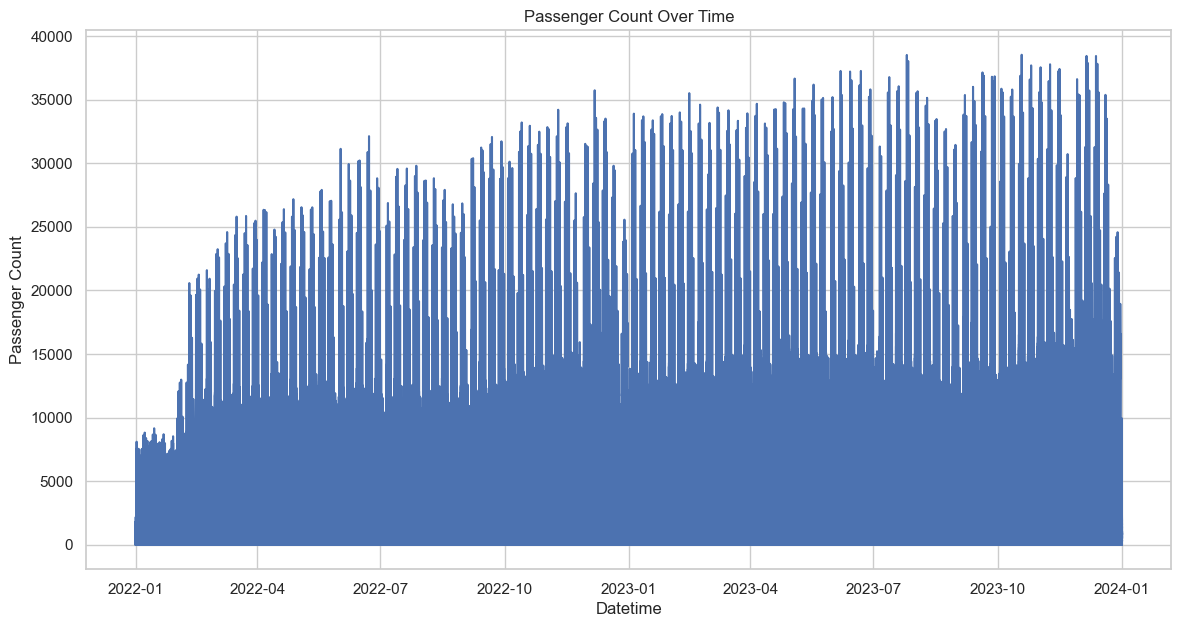

In [43]:
# 1. Passenger count over time for each company
plt.figure(figsize=(14, 7))

plt.plot(df['datetime'], df_grouped['passenger_count'])
plt.title('Passenger Count Over Time')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.grid(True)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_2932\840833536.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(index='hour', columns='week', values='passenger_count', aggfunc='sum')


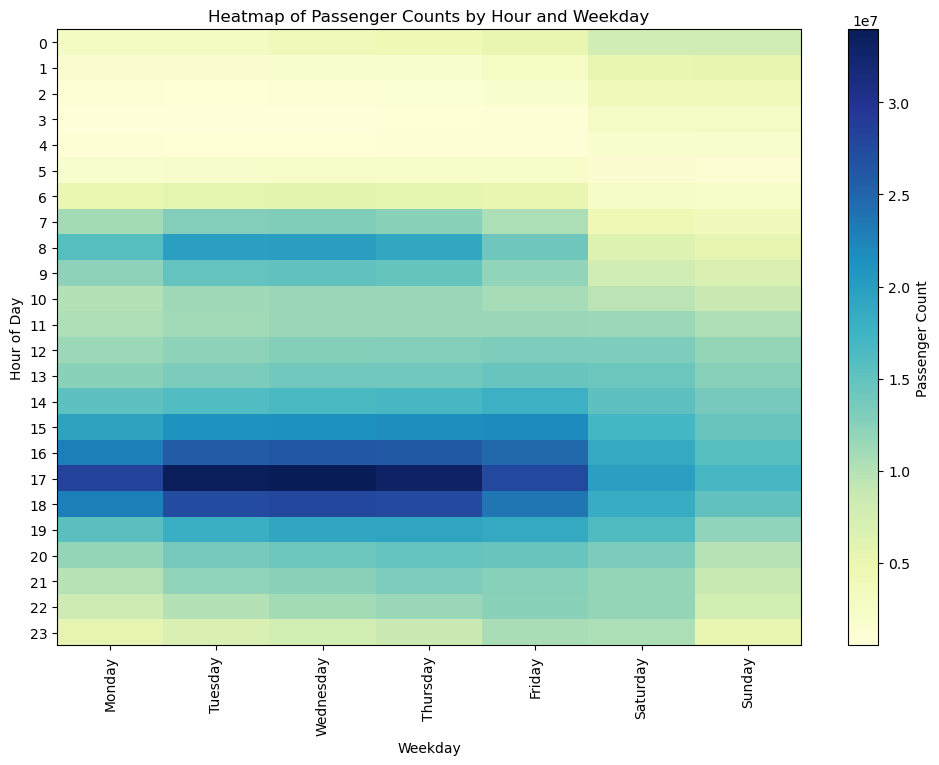

In [21]:
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['week'] = pd.Categorical(df['week'], categories=week_order, ordered=True)

# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='hour', columns='week', values='passenger_count', aggfunc='sum')
plt.figure(figsize=(12, 8))

plt.imshow(heatmap_data, aspect='auto', cmap='YlGnBu', interpolation='nearest')
plt.colorbar(label='Passenger Count')
plt.title('Heatmap of Passenger Counts by Hour and Weekday')
plt.xlabel('Weekday')
plt.ylabel('Hour of Day')

#Set the x and y ticks
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)


plt.show()

In [90]:
weather = pd.read_csv('Clean_Weather.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
weather.head()

,temperature_2m (°C),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),wind_speed_10m (km/h),weather_description,datetime,year_month,day,week,hour
0,-17.0,0.0,0.00,0.64,3,8.3,Overcast,2022-01-01 00:00:00,2022-01,1,Saturday,0
1,-15.6,0.0,0.07,0.64,71,8.0,Light Snow,2022-01-01 01:00:00,2022-01,1,Saturday,1
2,-14.7,0.0,0.07,0.64,71,7.6,Light Snow,2022-01-01 02:00:00,2022-01,1,Saturday,2
3,-14.2,0.0,0.07,0.64,71,7.0,Light Snow,2022-01-01 03:00:00,2022-01,1,Saturday,3
4,-12.6,0.0,0.14,0.64,71,7.0,Light Snow,2022-01-01 04:00:00,2022-01,1,Saturday,4


In [91]:
weather.isnull().sum()

temperature_2m (°C)        0
rain (mm)                  0
snowfall (cm)              0
snow_depth (m)             0
weather_code (wmo code)    0
wind_speed_10m (km/h)      0
weather_description        0
datetime                   0
year_month                 0
day                        0
week                       0
hour                       0
dtype: int64

In [92]:
weather.dtypes

temperature_2m (°C)        float64
rain (mm)                  float64
snowfall (cm)              float64
snow_depth (m)             float64
weather_code (wmo code)      int64
wind_speed_10m (km/h)      float64
weather_description         object
datetime                    object
year_month                  object
day                          int64
week                        object
hour                         int64
dtype: object

In [100]:
object_columns = df.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')   


df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)

print(df.dtypes)

taxi_zone                   int64
datetime           datetime64[ns]
passenger_count           float64
year_month               category
day                         int64
week                     category
hour                        int64
dtype: object


In [101]:
object_columns = weather.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    weather[column] = weather[column].astype('category')   


weather['datetime'] = pd.to_datetime(weather['datetime']).dt.tz_localize(None)

print(weather.dtypes)

temperature_2m (°C)               float64
rain (mm)                         float64
snowfall (cm)                     float64
snow_depth (m)                    float64
weather_code (wmo code)             int64
wind_speed_10m (km/h)             float64
weather_description              category
datetime                   datetime64[ns]
year_month                       category
day                                 int64
week                             category
hour                                int64
dtype: object


In [102]:
# Merge the DataFrames on the datetime column
combined_df = pd.merge(df, weather, on='datetime', how='left')

# Display the combined DataFrame
combined_df

,taxi_zone,datetime,passenger_count,year_month_x,day_x,week_x,hour_x,temperature_2m (°C),rain (mm),snowfall (cm),snow_depth (m),weather_code (wmo code),wind_speed_10m (km/h),weather_description,year_month_y,day_y,week_y,hour_y
0,4,2022-01-01 00:00:00,890.500000,2022-01,1,Saturday,0,-17.0,0.0,0.00,0.64,3,8.3,Overcast,2022-01,1,Saturday,0
1,4,2022-01-01 01:00:00,793.239130,2022-01,1,Saturday,1,-15.6,0.0,0.07,0.64,71,8.0,Light Snow,2022-01,1,Saturday,1
2,4,2022-01-01 02:00:00,686.500000,2022-01,1,Saturday,2,-14.7,0.0,0.07,0.64,71,7.6,Light Snow,2022-01,1,Saturday,2
3,4,2022-01-01 03:00:00,523.891304,2022-01,1,Saturday,3,-14.2,0.0,0.07,0.64,71,7.0,Light Snow,2022-01,1,Saturday,3
4,4,2022-01-01 04:00:00,351.956522,2022-01,1,Saturday,4,-12.6,0.0,0.14,0.64,71,7.0,Light Snow,2022-01,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173171,263,2023-12-31 19:00:00,1263.000000,2023-12,31,Sunday,19,-20.2,0.0,0.00,0.88,0,9.4,Fair,2023-12,31,Sunday,19
1173172,263,2023-12-31 20:00:00,1138.000000,2023-12,31,Sunday,20,-21.3,0.0,0.00,0.87,0,9.4,Fair,2023-12,31,Sunday,20
1173173,263,2023-12-31 21:00:00,1136.000000,2023-12,31,Sunday,21,-22.2,0.0,0.00,0.87,0,9.8,Fair,2023-12,31,Sunday,21
1173174,263,2023-12-31 22:00:00,972.000000,2023-12,31,Sunday,22,-22.9,0.0,0.00,0.87,0,9.8,Fair,2023-12,31,Sunday,22


In [103]:
# Select relevant features
selected_features = ['datetime', 'taxi_zone', 'year_month_x','day_x', 'week_x', 'hour_x', 'passenger_count', 'temperature_2m (°C)', 'rain (mm)','snow_depth (m)', 'snowfall (cm)', 'wind_speed_10m (km/h)']
df_reduced = combined_df[selected_features]
df_reduced['day'] = df_reduced['day_x']
df_reduced['week'] = df_reduced['week_x']
df_reduced['hour'] = df_reduced['hour_x']
df_reduced['year_month'] = df_reduced['year_month_x']

df_reduced.drop('day_x', axis=1, inplace=True)
df_reduced.drop('week_x', axis=1, inplace=True)
df_reduced.drop('hour_x', axis=1, inplace=True)
df_reduced.drop('year_month_x', axis=1, inplace=True)

df_reduced.head()

C:\Users\natha\AppData\Local\Temp\ipykernel_19132\3436301222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['day'] = df_reduced['day_x']
C:\Users\natha\AppData\Local\Temp\ipykernel_19132\3436301222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['week'] = df_reduced['week_x']
C:\Users\natha\AppData\Local\Temp\ipykernel_19132\3436301222.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,datetime,taxi_zone,passenger_count,temperature_2m (°C),rain (mm),snow_depth (m),snowfall (cm),wind_speed_10m (km/h),day,week,hour,year_month
0,2022-01-01 00:00:00,4,890.500000,-17.0,0.0,0.64,0.00,8.3,1,Saturday,0,2022-01
1,2022-01-01 01:00:00,4,793.239130,-15.6,0.0,0.64,0.07,8.0,1,Saturday,1,2022-01
2,2022-01-01 02:00:00,4,686.500000,-14.7,0.0,0.64,0.07,7.6,1,Saturday,2,2022-01
3,2022-01-01 03:00:00,4,523.891304,-14.2,0.0,0.64,0.07,7.0,1,Saturday,3,2022-01
4,2022-01-01 04:00:00,4,351.956522,-12.6,0.0,0.64,0.14,7.0,1,Saturday,4,2022-01


In [104]:
#pip install --upgrade holidays
import holidays

# Dictionary of US holidays for 2022 and 2023
us_holidays = dict(holidays.US(years=[2022, 2023]))

df_reduced['datetime'] = pd.to_datetime(df_reduced['datetime'])

# Create a new 'holiday' column. If the date is a US holiday, it will have the holiday's name;
# otherwise, it will be "No"
df_reduced['holiday'] = df_reduced['datetime'].dt.date.apply(lambda x: us_holidays.get(x, "No"))
df_reduced.head()

C:\Users\natha\AppData\Local\Temp\ipykernel_19132\1575881909.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['datetime'] = pd.to_datetime(df_reduced['datetime'])
C:\Users\natha\AppData\Local\Temp\ipykernel_19132\1575881909.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['holiday'] = df_reduced['datetime'].dt.date.apply(lambda x: us_holidays.get(x, "No"))


,datetime,taxi_zone,passenger_count,temperature_2m (°C),rain (mm),snow_depth (m),snowfall (cm),wind_speed_10m (km/h),day,week,hour,year_month,holiday
0,2022-01-01 00:00:00,4,890.500000,-17.0,0.0,0.64,0.00,8.3,1,Saturday,0,2022-01,New Year's Day
1,2022-01-01 01:00:00,4,793.239130,-15.6,0.0,0.64,0.07,8.0,1,Saturday,1,2022-01,New Year's Day
2,2022-01-01 02:00:00,4,686.500000,-14.7,0.0,0.64,0.07,7.6,1,Saturday,2,2022-01,New Year's Day
3,2022-01-01 03:00:00,4,523.891304,-14.2,0.0,0.64,0.07,7.0,1,Saturday,3,2022-01,New Year's Day
4,2022-01-01 04:00:00,4,351.956522,-12.6,0.0,0.64,0.14,7.0,1,Saturday,4,2022-01,New Year's Day


In [105]:
 # check null value
df_reduced.isnull().sum()

datetime                 0
taxi_zone                0
passenger_count          0
temperature_2m (°C)      0
rain (mm)                0
snow_depth (m)           0
snowfall (cm)            0
wind_speed_10m (km/h)    0
day                      0
week                     0
hour                     0
year_month               0
holiday                  0
dtype: int64

In [106]:
df_reduced.dtypes

datetime                 datetime64[ns]
taxi_zone                         int64
passenger_count                 float64
temperature_2m (°C)             float64
rain (mm)                       float64
snow_depth (m)                  float64
snowfall (cm)                   float64
wind_speed_10m (km/h)           float64
day                               int64
week                           category
hour                              int64
year_month                     category
holiday                          object
dtype: object

In [107]:
# Convert 'year_month' to 'month'
df_reduced['year_month'] = pd.to_datetime(df_reduced['year_month']).dt.month
df_reduced

C:\Users\natha\AppData\Local\Temp\ipykernel_19132\4034377959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['year_month'] = pd.to_datetime(df_reduced['year_month']).dt.month


,datetime,taxi_zone,passenger_count,temperature_2m (°C),rain (mm),snow_depth (m),snowfall (cm),wind_speed_10m (km/h),day,week,hour,year_month,holiday
0,2022-01-01 00:00:00,4,890.500000,-17.0,0.0,0.64,0.00,8.3,1,Saturday,0,1,New Year's Day
1,2022-01-01 01:00:00,4,793.239130,-15.6,0.0,0.64,0.07,8.0,1,Saturday,1,1,New Year's Day
2,2022-01-01 02:00:00,4,686.500000,-14.7,0.0,0.64,0.07,7.6,1,Saturday,2,1,New Year's Day
3,2022-01-01 03:00:00,4,523.891304,-14.2,0.0,0.64,0.07,7.0,1,Saturday,3,1,New Year's Day
4,2022-01-01 04:00:00,4,351.956522,-12.6,0.0,0.64,0.14,7.0,1,Saturday,4,1,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173171,2023-12-31 19:00:00,263,1263.000000,-20.2,0.0,0.88,0.00,9.4,31,Sunday,19,12,No
1173172,2023-12-31 20:00:00,263,1138.000000,-21.3,0.0,0.87,0.00,9.4,31,Sunday,20,12,No
1173173,2023-12-31 21:00:00,263,1136.000000,-22.2,0.0,0.87,0.00,9.8,31,Sunday,21,12,No
1173174,2023-12-31 22:00:00,263,972.000000,-22.9,0.0,0.87,0.00,9.8,31,Sunday,22,12,No


In [108]:
print("year_month: ", df_reduced['year_month'].unique().tolist(), "\n")

year_month:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12] 



In [109]:
df_reduced = df_reduced.rename(columns={
    'year_month': 'month'
})
df_reduced

,datetime,taxi_zone,passenger_count,temperature_2m (°C),rain (mm),snow_depth (m),snowfall (cm),wind_speed_10m (km/h),day,week,hour,month,holiday
0,2022-01-01 00:00:00,4,890.500000,-17.0,0.0,0.64,0.00,8.3,1,Saturday,0,1,New Year's Day
1,2022-01-01 01:00:00,4,793.239130,-15.6,0.0,0.64,0.07,8.0,1,Saturday,1,1,New Year's Day
2,2022-01-01 02:00:00,4,686.500000,-14.7,0.0,0.64,0.07,7.6,1,Saturday,2,1,New Year's Day
3,2022-01-01 03:00:00,4,523.891304,-14.2,0.0,0.64,0.07,7.0,1,Saturday,3,1,New Year's Day
4,2022-01-01 04:00:00,4,351.956522,-12.6,0.0,0.64,0.14,7.0,1,Saturday,4,1,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173171,2023-12-31 19:00:00,263,1263.000000,-20.2,0.0,0.88,0.00,9.4,31,Sunday,19,12,No
1173172,2023-12-31 20:00:00,263,1138.000000,-21.3,0.0,0.87,0.00,9.4,31,Sunday,20,12,No
1173173,2023-12-31 21:00:00,263,1136.000000,-22.2,0.0,0.87,0.00,9.8,31,Sunday,21,12,No
1173174,2023-12-31 22:00:00,263,972.000000,-22.9,0.0,0.87,0.00,9.8,31,Sunday,22,12,No


In [110]:
df_reduced.dtypes

datetime                 datetime64[ns]
taxi_zone                         int64
passenger_count                 float64
temperature_2m (°C)             float64
rain (mm)                       float64
snow_depth (m)                  float64
snowfall (cm)                   float64
wind_speed_10m (km/h)           float64
day                               int64
week                           category
hour                              int64
month                             int32
holiday                          object
dtype: object

In [111]:
# Save the prepared DataFrame to a new CSV file
df_reduced.to_csv('basic_prepared_data.csv', index=False)

In [119]:
df_reduced = pd.read_csv('basic_prepared_data.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df_reduced.head()

,datetime,taxi_zone,passenger_count,temperature_2m (°C),rain (mm),snow_depth (m),snowfall (cm),wind_speed_10m (km/h),day,week,hour,month,holiday
0,2022-01-01 00:00:00,4,890.500000,-17.0,0.0,0.64,0.00,8.3,1,Saturday,0,1,New Year's Day
1,2022-01-01 01:00:00,4,793.239130,-15.6,0.0,0.64,0.07,8.0,1,Saturday,1,1,New Year's Day
2,2022-01-01 02:00:00,4,686.500000,-14.7,0.0,0.64,0.07,7.6,1,Saturday,2,1,New Year's Day
3,2022-01-01 03:00:00,4,523.891304,-14.2,0.0,0.64,0.07,7.0,1,Saturday,3,1,New Year's Day
4,2022-01-01 04:00:00,4,351.956522,-12.6,0.0,0.64,0.14,7.0,1,Saturday,4,1,New Year's Day


In [120]:
# Convert categorical features into numerical using one-hot encoding
df_reduced = pd.get_dummies(df_reduced, columns=['week', 'holiday'])

In [121]:
# rolling mean and standard deviation features
df_reduced['rolling_mean_3'] = df_reduced['passenger_count'].rolling(window=3).mean()
df_reduced['rolling_std_3'] = df_reduced['passenger_count'].rolling(window=3).std()

In [122]:
# Create lag features for passenger count
for lag in range(1, 4):  # Example: Lag features for the past 1, 2, and 3 hours
    df_reduced[f'passenger_count_lag_{lag}'] = df_reduced.groupby('taxi_zone')['passenger_count'].shift(lag)
# Drop rows with NaN values generated by the lag
df_reduced.dropna(inplace=True)

In [123]:
# Check and convert categorical columns (one-hot encoded)
categorical_columns = [col for col in df_reduced.columns if 'week_' in col or 'holiday_' in col]
for col in categorical_columns:
    df_reduced[col] = df_reduced[col].astype(int)

# Ensure numerical columns are of the correct type
numerical_columns = ['passenger_count', 'temperature_2m (°C)', 'rain (mm)', 'snow_depth (m)',
                     'snowfall (cm)', 'wind_speed_10m (km/h)'] + \
                    [f'passenger_count_lag_{lag}' for lag in range(1, 4)]

for col in numerical_columns:
    df_reduced[col] = df_reduced[col].astype(float)

# Display the DataFrame with the correct data types
print(df_reduced.dtypes)

datetime                                                    object
taxi_zone                                                    int64
passenger_count                                            float64
temperature_2m (°C)                                        float64
rain (mm)                                                  float64
snow_depth (m)                                             float64
snowfall (cm)                                              float64
wind_speed_10m (km/h)                                      float64
day                                                          int64
hour                                                         int64
month                                                        int64
week_Friday                                                  int32
week_Monday                                                  int32
week_Saturday                                                int32
week_Sunday                                                  i

In [127]:
df_reduced.dtypes

datetime                                                    object
taxi_zone                                                    int64
passenger_count                                            float64
temperature_2m (°C)                                        float64
rain (mm)                                                  float64
snow_depth (m)                                             float64
snowfall (cm)                                              float64
wind_speed_10m (km/h)                                      float64
day                                                          int64
hour                                                         int64
month                                                        int64
week_Friday                                                  int32
week_Monday                                                  int32
week_Saturday                                                int32
week_Sunday                                                  i

In [128]:
df_reduced['datetime'] = pd.to_datetime(df_reduced['datetime'])

# new time series features
df_reduced['month'] = df_reduced['datetime'].dt.month
df_reduced['day_of_week'] = df_reduced['datetime'].dt.dayofweek
df_reduced['is_weekend'] = df_reduced['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df_reduced['quarter'] = df_reduced['datetime'].dt.quarter

In [130]:
df_reduced.head()

,datetime,taxi_zone,passenger_count,temperature_2m (°C),rain (mm),snow_depth (m),snowfall (cm),wind_speed_10m (km/h),day,hour,...,holiday_Veterans Day (observed),holiday_Washington's Birthday,rolling_mean_3,rolling_std_3,passenger_count_lag_1,passenger_count_lag_2,passenger_count_lag_3,day_of_week,is_weekend,quarter
3,2022-01-01 03:00:00,4,523.891304,-14.2,0.0,0.64,0.07,7.0,1,3,...,0,0,667.876812,135.636205,686.500000,793.239130,890.500000,5,1,1
4,2022-01-01 04:00:00,4,351.956522,-12.6,0.0,0.64,0.14,7.0,1,4,...,0,0,520.782609,167.293403,523.891304,686.500000,793.239130,5,1,1
5,2022-01-01 05:00:00,4,284.500000,-10.1,0.0,0.64,0.14,5.6,1,5,...,0,0,386.782609,123.436994,351.956522,523.891304,686.500000,5,1,1
6,2022-01-01 06:00:00,4,471.391304,-7.4,0.0,0.64,0.21,4.4,1,6,...,0,0,369.282609,94.642669,284.500000,351.956522,523.891304,5,1,1
7,2022-01-01 07:00:00,4,1116.391304,-6.7,0.0,0.64,0.21,4.2,1,7,...,0,0,624.094203,436.462389,471.391304,284.500000,351.956522,5,1,1


In [131]:
# Save the prepared DataFrame to a new CSV file
df_reduced.to_csv('model_prepared_data.csv', index=False)